In [1]:
from datagen import SemCorDataSet
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

In [2]:

all = SemCorDataSet.unpickle('dataset/train.pkl')
semcor = SemCorDataSet.unpickle('dataset/train_semcor_only.pkl')
omsti = SemCorDataSet(all.df[semcor.df.shape[0]:])

## Train Dateset Analysis

In [3]:
def print_alinged(key, value):
    print(f"{key: <35} = {value:>20,}")

In [4]:
def num_tokens(dataset):
    return dataset.df.shape[0]

print_alinged("Total token count", num_tokens(all))
print_alinged("- SemCor token count", num_tokens(semcor))
print_alinged("- OMSTI token count", num_tokens(omsti))

Total token count                   =           31,243,829
- SemCor token count                =              802,443
- OMSTI token count                 =           30,441,386


In [5]:
def num_sense_tokens(dataset):
    df = dataset.df
    sense_tokesn = df[df["sense-keys"].notnull()]
    return sense_tokesn.shape[0]

print_alinged("Total tokens with sense count", num_sense_tokens(all))
print_alinged("- SemCor tokens with sense count", num_sense_tokens(semcor))
print_alinged("- OMSTI tokens with sense count", num_sense_tokens(omsti))

Total tokens with sense count       =            1,137,170
- SemCor tokens with sense count    =              226,036
- OMSTI tokens with sense count     =              911,134


In [6]:
def num_sentences(dataset):
    return len(dataset.sentences().groups)

print_alinged("Total sentence count", num_sentences(all))
print_alinged("- SemCor sentence count", num_sentences(semcor))
print_alinged("- OMSTI sentence count", num_sentences(omsti))

Total sentence count                =              850,974
- SemCor sentence count             =               37,176
- OMSTI sentence count              =              813,798


### Per-Sentence statistics

In [7]:
def sentences_token_stat(dataset):
    sentence_counts = dataset.sentences().count()
    print(sentence_counts[['token', 'sense-keys']].describe())
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 7.5))
    sentence_counts.hist(column=["token"], ax=axes[0], sharey=True, bins=50, legend=True, range=(0, 100))
    axes[0].set_title("Tokens per sentence")
    sentence_counts.hist(column=["sense-keys"], ax=axes[1], sharey=True, bins=50, legend=True, range=(0, 100), color="orange")
    axes[1].set_title("Sense tokens per sentence")
    


#### Both

               token     sense-keys
count  850974.000000  850974.000000
mean       36.715374       1.336316
std        18.072891       1.628438
min         1.000000       0.000000
25%        24.000000       1.000000
50%        34.000000       1.000000
75%        46.750000       1.000000
max       258.000000     104.000000


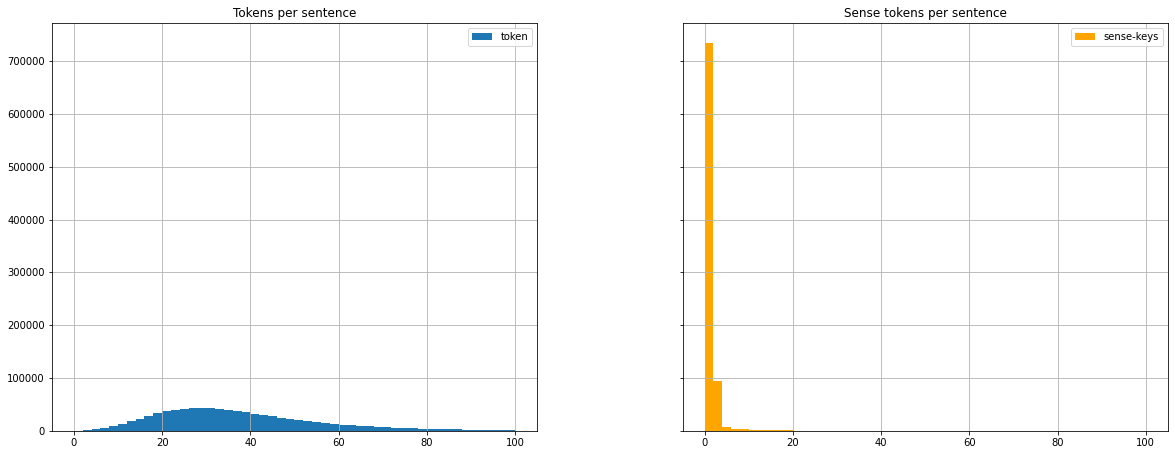

In [8]:
sentences_token_stat(all)

#### SemCor

              token    sense-keys
count  37176.000000  37176.000000
mean      21.584974      6.080159
std       13.685187      5.836995
min        1.000000      0.000000
25%       12.000000      2.000000
50%       19.000000      4.000000
75%       28.000000      9.000000
max      258.000000    104.000000


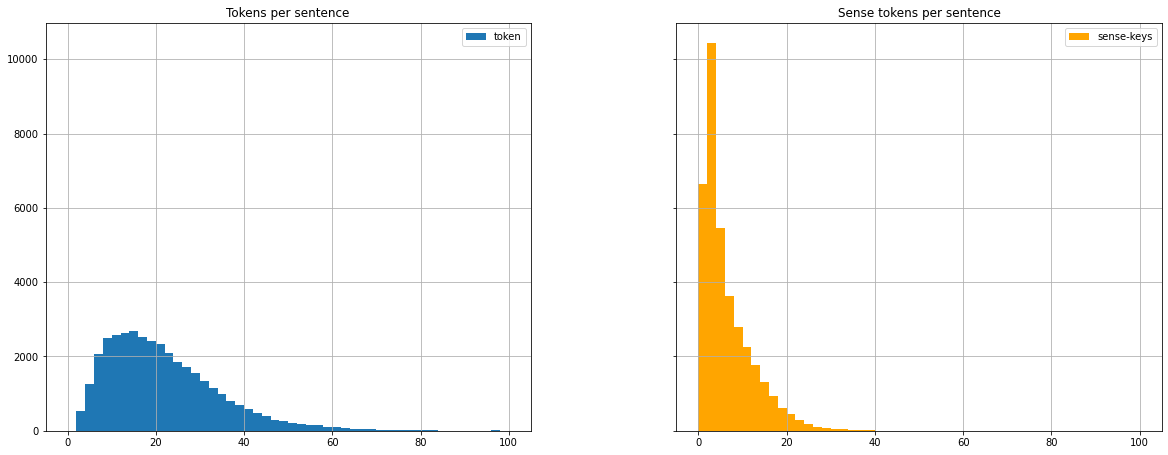

In [9]:
sentences_token_stat(semcor)

#### OMSTI

               token     sense-keys
count  813798.000000  813798.000000
mean       37.406563       1.119607
std        17.946016       0.376275
min         1.000000       1.000000
25%        24.000000       1.000000
50%        34.000000       1.000000
75%        47.000000       1.000000
max       187.000000      11.000000


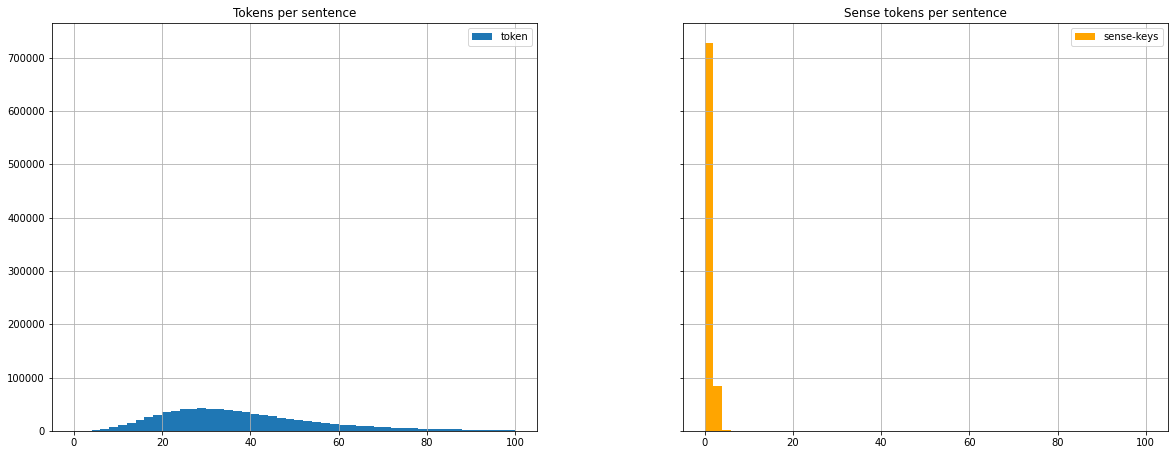

In [10]:
sentences_token_stat(omsti)

### Token analysis


In [11]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tkrieger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def token_analysis(dataset):

    stop_words = set(nltk.corpus.stopwords.words('english'))
    lemmas_only = dataset.df['lemma']
    lemmas_stop = lemmas_only[lemmas_only.isin(stop_words)].to_frame()
    lemmas_no_stop = lemmas_only[~lemmas_only.isin(stop_words)].to_frame()
    lemmas_with_sense = lemmas_only[dataset.df['sense-keys'].notnull()].to_frame()
    
    dataset.df[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title='Top 50 tokens')
    lemmas_stop[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title="Top 50 stop tokens")
    lemmas_no_stop[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title="Top 50 non stop tokens")
    lemmas_with_sense[['lemma']].apply(pd.value_counts).sort_values(ascending=False, by='lemma').head(50).plot(kind="bar", figsize=(20, 7.5), title="Top 50 tokens with sense", color='orange')


    lemma_groups = dataset.df.groupby("lemma")
    lemma_token_counts = lemma_groups.count()
    print(lemma_token_counts[["token"]].describe())

#### Both togehter

              token
count  1.880290e+05
mean   1.661649e+02
std    8.939873e+03
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    4.000000e+00
max    2.409166e+06


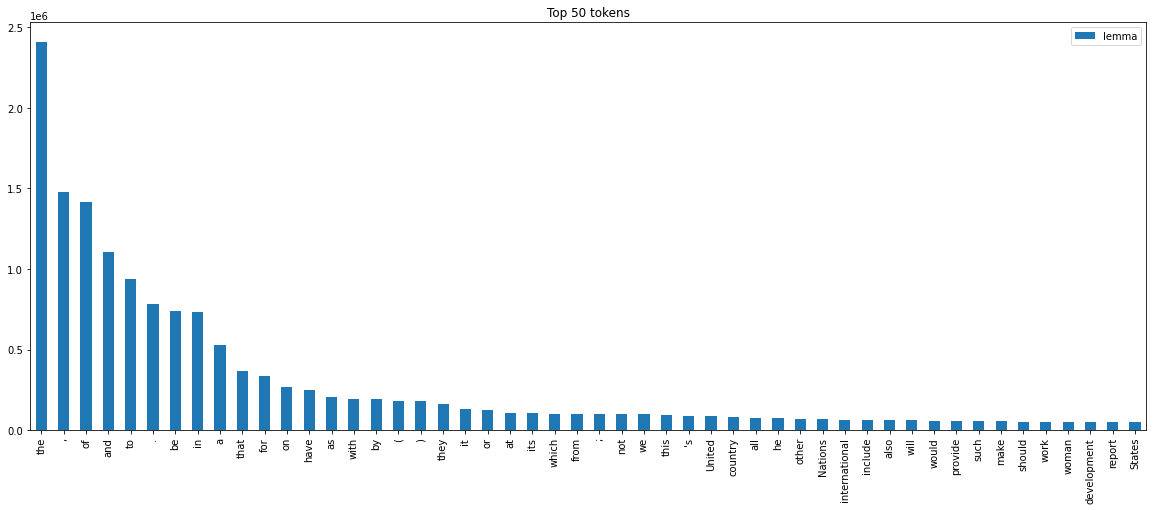

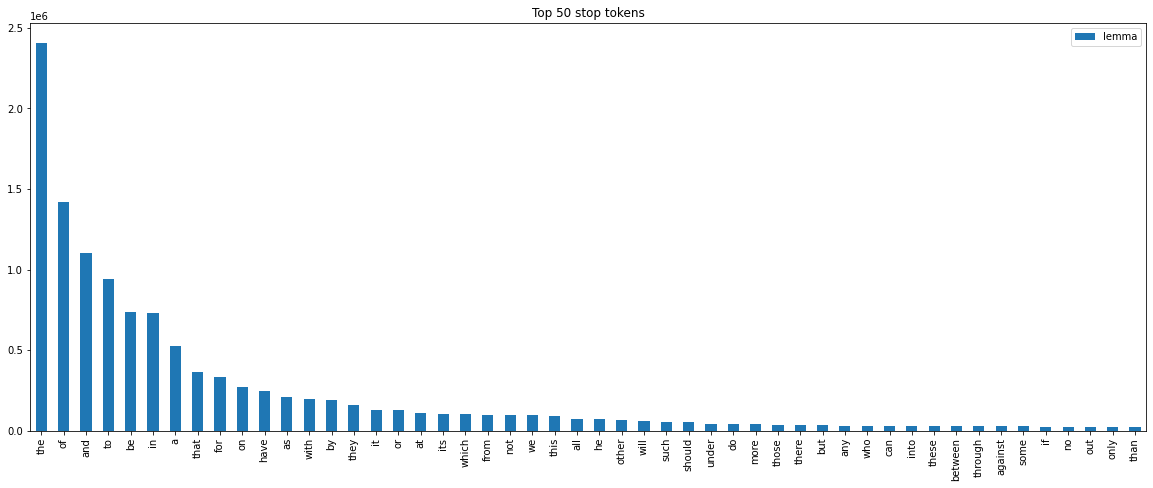

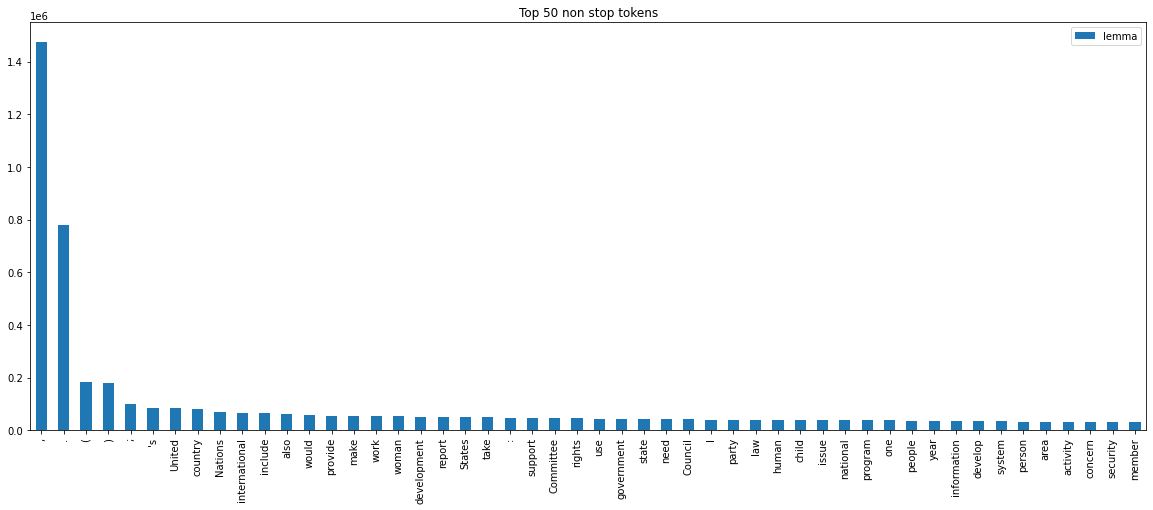

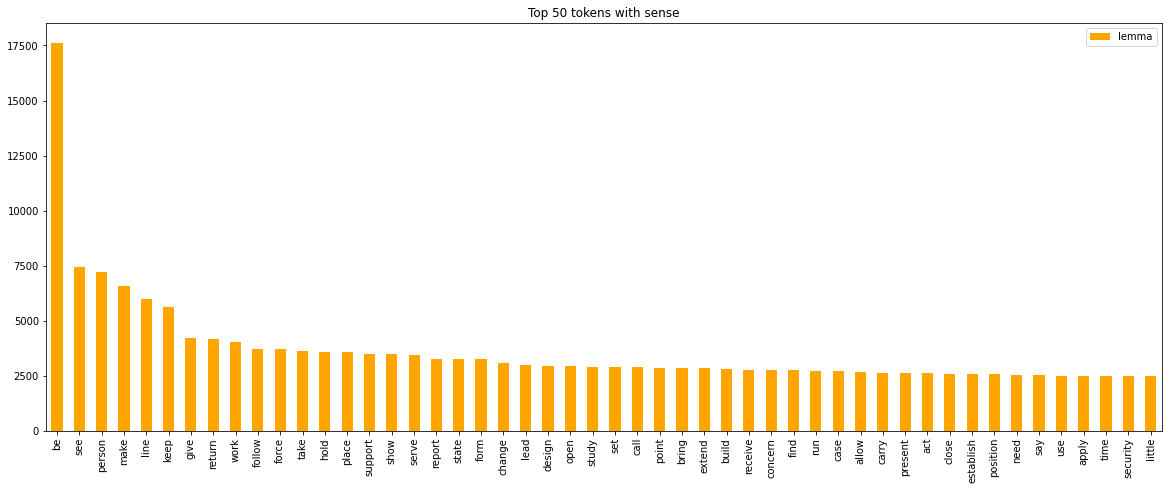

In [13]:
token_analysis(all)


#### SemCor

              token
count  34968.000000
mean      22.947924
std      499.929942
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max    48752.000000


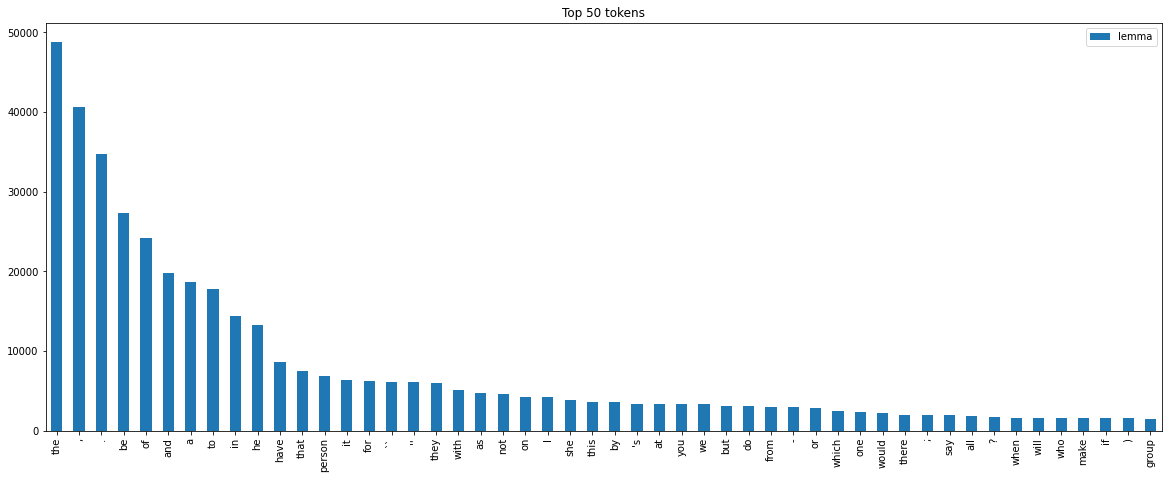

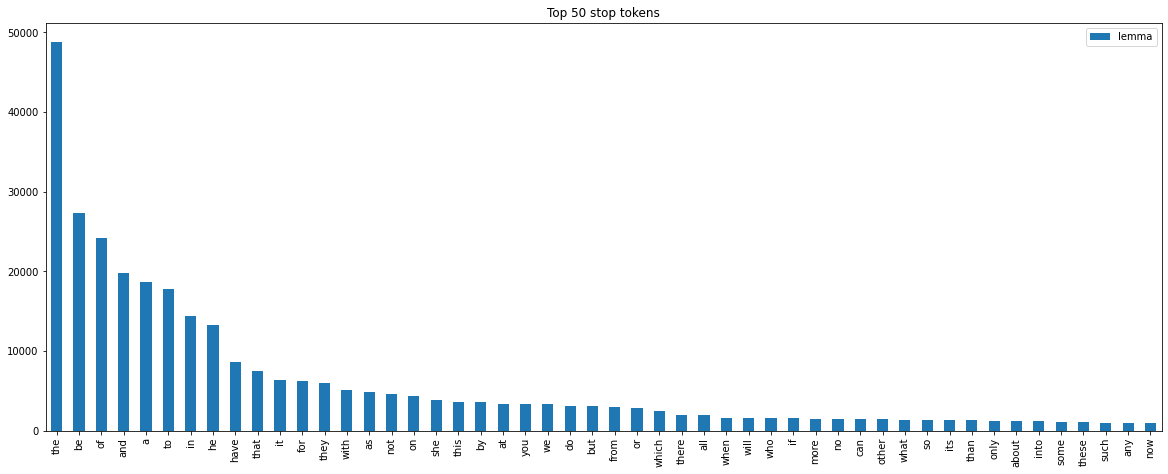

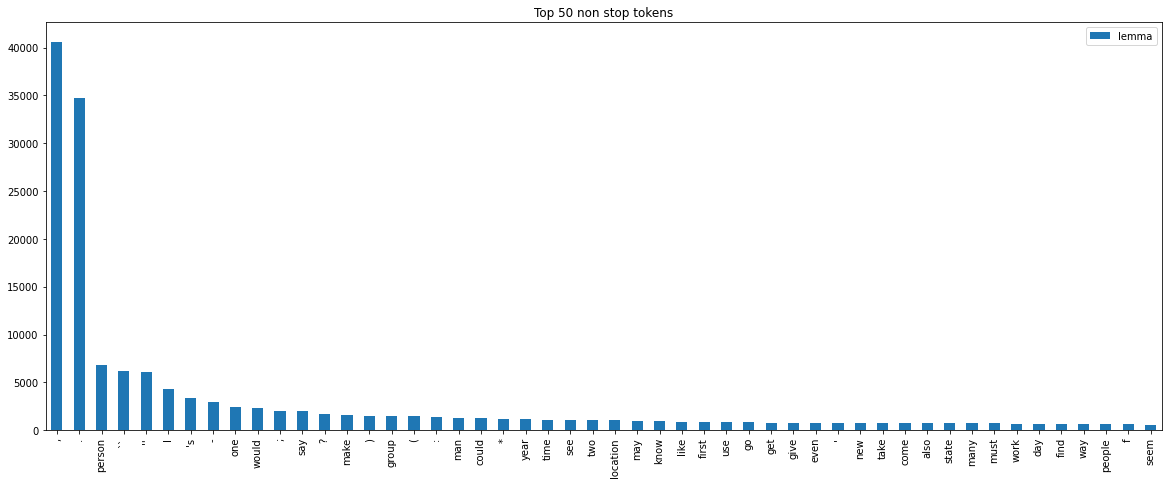

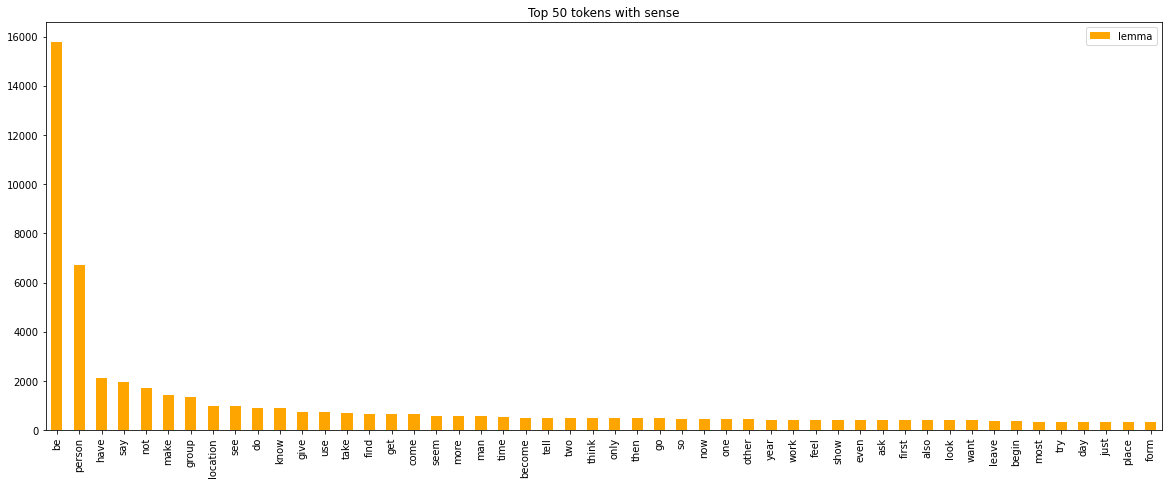

In [14]:
token_analysis(semcor)

#### OMSTI

              token
count  1.728320e+05
mean   1.761328e+02
std    9.114106e+03
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    4.000000e+00
max    2.360414e+06


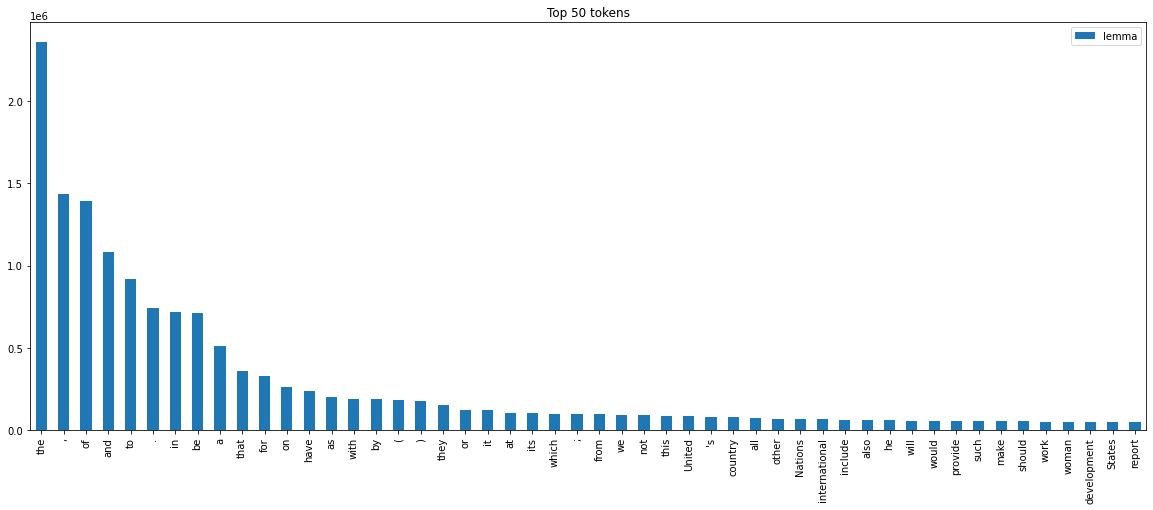

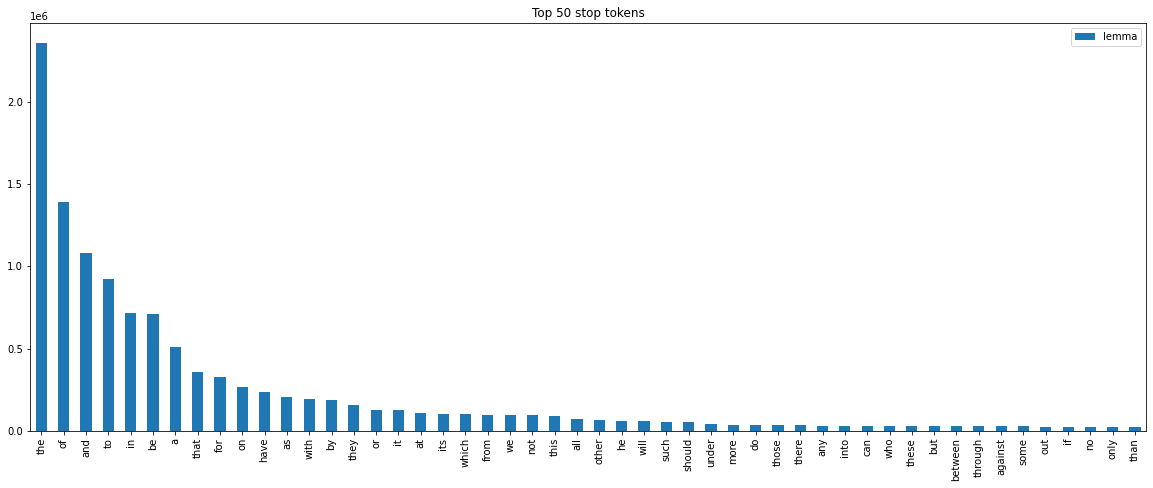

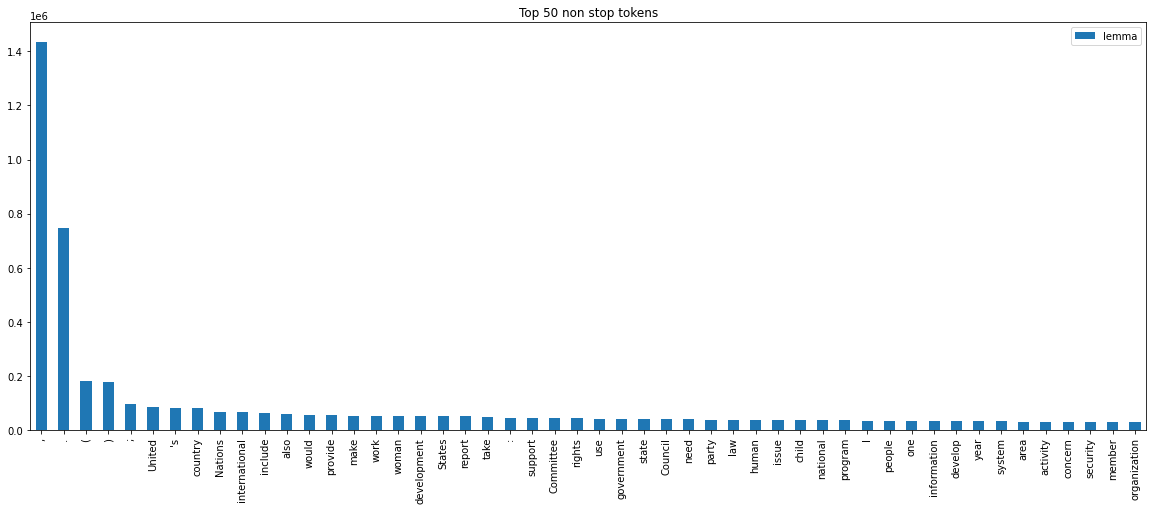

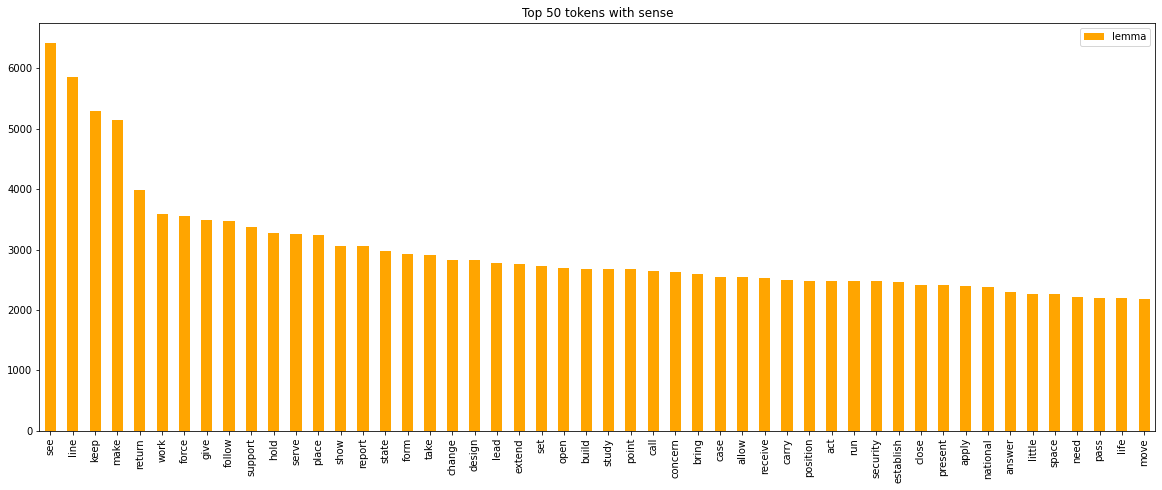

In [15]:
token_analysis(omsti)

### Sense Analysis

In [16]:
def sense_analysis(dataset):
    print_alinged('Unique senses', dataset.df['sense-keys'].nunique())
    dataset.df[['sense-keys']].apply(pd.value_counts).sort_values(ascending=False, by='sense-keys').head(50).plot(kind="bar", figsize=(20, 7.5), title='Top 50 senses', color='orange')

#### Both

Unique senses                       =               34,322


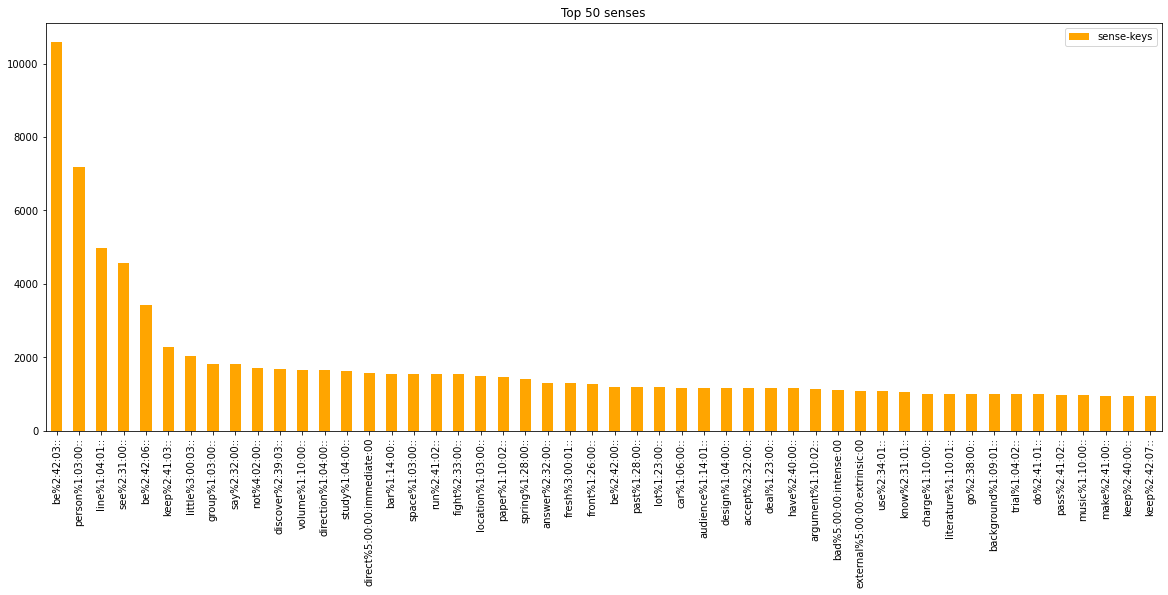

In [17]:
sense_analysis(all)

#### SemCor

Unique senses                       =               33,711


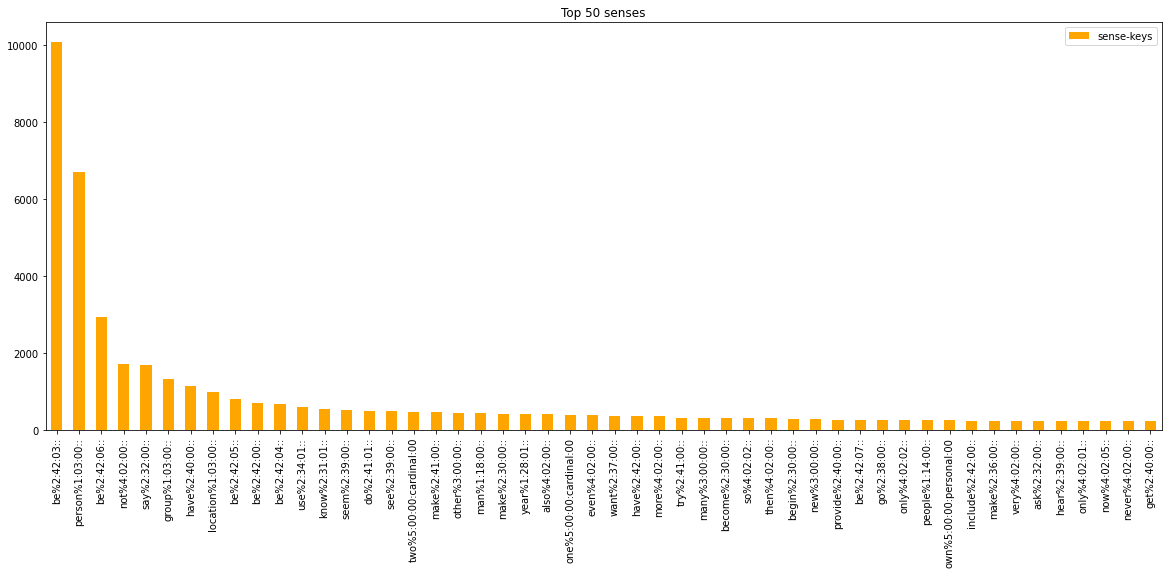

In [18]:
sense_analysis(semcor)

#### OMSTI

Unique senses                       =                3,725


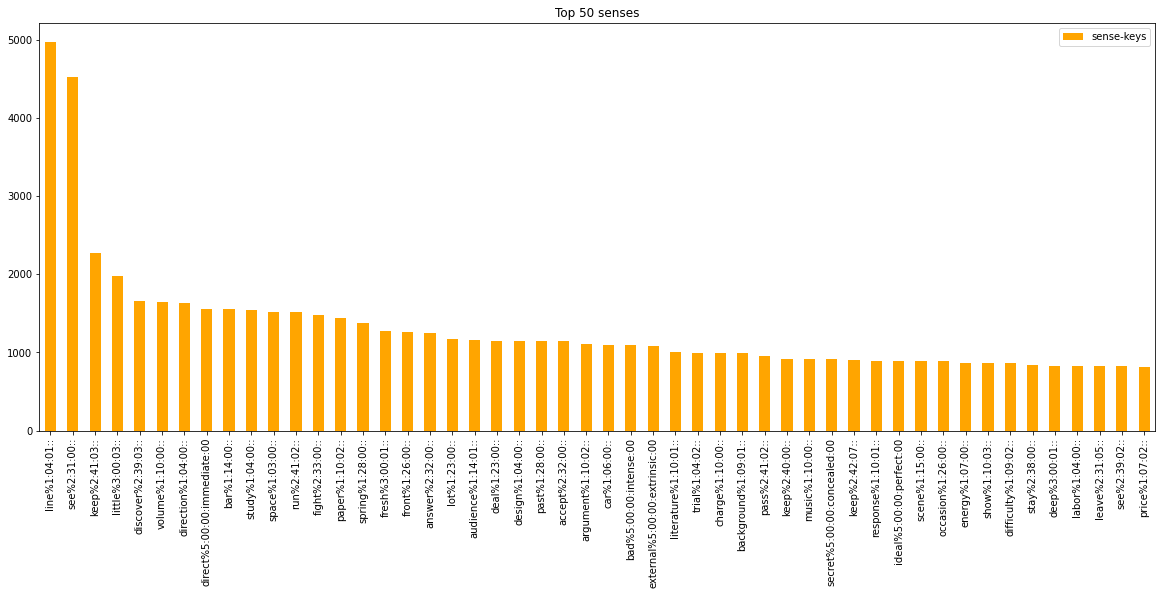

In [19]:
sense_analysis(omsti)

### Sense/POS Analysis

In [20]:
import nltk.tag as tag
nltk.download('averaged_perceptron_tagger')

def sense_pos_analysis(dataset):
    sentences = dataset.sentences()

    all = dataset.df.copy()
    all['pos'] = ""

    for key, _ in sentences:
        sentence_frame = sentences.get_group(key)
        tagged_tokens = tag.pos_tag(sentence_frame['token'])
        for token_num, row_df in enumerate(sentence_frame.index.to_list()):
            _, pos = tagged_tokens[token_num]
            all.at[row_df, 'pos'] = pos
    
    with_sense = all[dataset.df['sense-keys'].notnull()]
    with_sense[['pos']].apply(pd.value_counts).sort_values(ascending=False, by='pos').plot(kind="bar", figsize=(20, 7.5), title='Sense tokens per POS', color='orange')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tkrieger/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Both

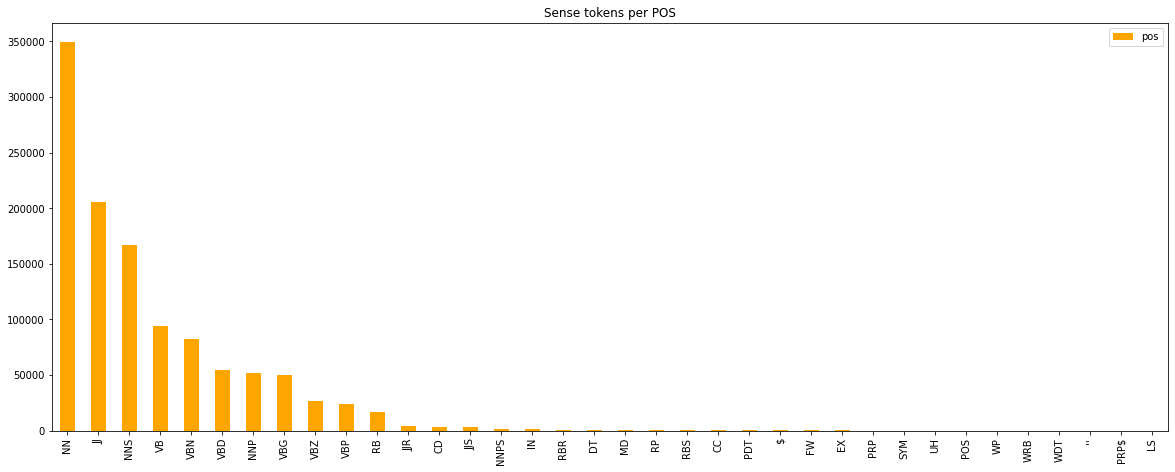

In [21]:
sense_pos_analysis(all)

#### SemCor

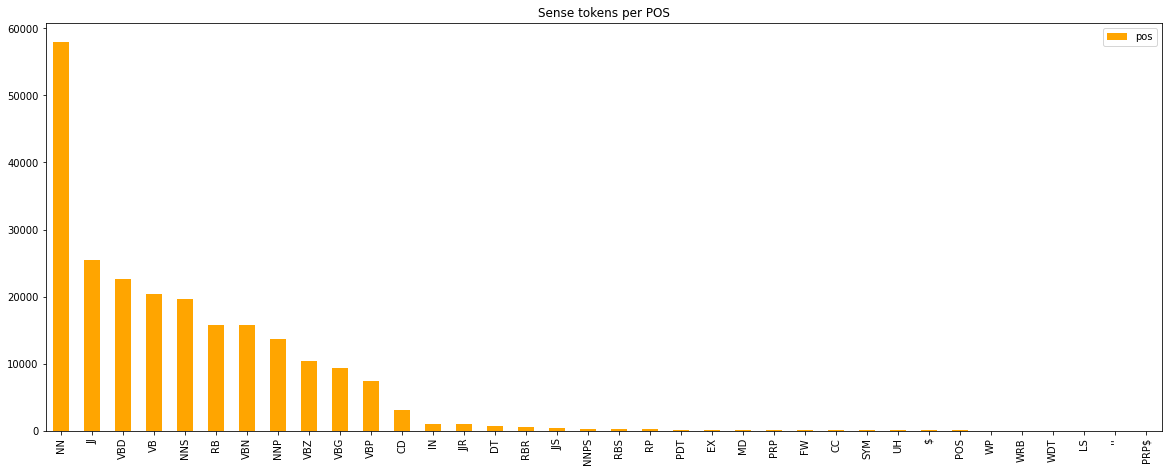

In [22]:
sense_pos_analysis(semcor)

#### OMSTI

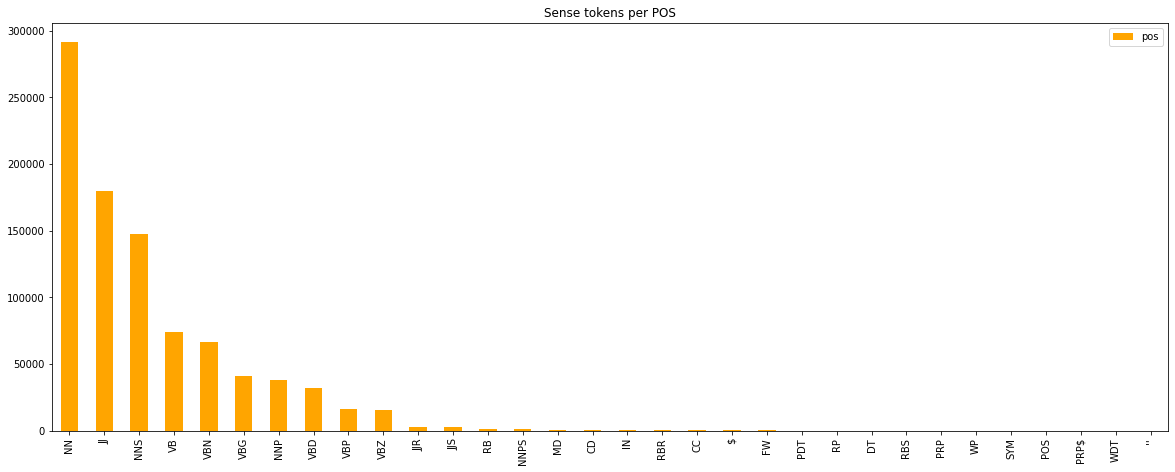

In [23]:
sense_pos_analysis(omsti)